In [1]:
from model.infer_cot import infer_cot
model=infer_cot()

`Qwen2VLRotaryEmbedding` can now be fully parameterized by passing the model config through the `config` argument. All other arguments will be removed in v4.46


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/5 [00:00<?, ?it/s]

[2024/11/29 23:41:46] ppocr DEBUG: Namespace(alpha=1.0, alphacolor=(255, 255, 255), benchmark=False, beta=1.0, binarize=False, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_box_type='quad', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='/root/.paddleocr/whl/det/ch/ch_PP-OCRv4_det_infer', det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=None, e2e_pgnet_mode='fast', e2e

In [2]:
import json


data_info=json.load(open('/home/pubw/proj/LLaMA-Factory/data/mire/train_modified.json'))
input_data=[data_info[586]]

In [3]:
input_data

[{'id': '82655459-60ae-4578-bcdc-3e4ffc07413a-1510',
  'instruction': 'Picture 1: <image>\n你是一个电商领域识图专家,可以理解消费者上传的软件截图或实物拍摄图。现在,请你对消费者上传的图片进行分类。你只需要回答图片分类结果,不需要其他多余的话。以下是可以参考的分类标签,分类标签:["实物拍摄(含售后)","商品分类选项","商品头图","商品详情页截图","下单过程中出现异常（显示购买失败浮窗）","订单详情页面","支付页面","消费者与客服聊天页面","评论区截图页面","物流页面-物流列表页面","物流页面-物流跟踪页面","物流页面-物流异常页面","退款页面","退货页面","换货页面","购物车页面","店铺页面","活动页面","优惠券领取页面","账单/账户页面","个人信息页面","投诉举报页面","平台介入页面","外部APP截图","其他类别图片"]。',
  'input': '',
  'output': '购物车页面',
  'image': ['/home/pubw/datasets/www25/train/images/82655459-60ae-4578-bcdc-3e4ffc07413a-1510-0.jpg']}]

In [4]:
model(input_data)

messages_2b [[{'role': 'user', 'content': [{'type': 'image', 'image': '/home/pubw/datasets/www25/train/images/82655459-60ae-4578-bcdc-3e4ffc07413a-1510-0.jpg'}, {'type': 'text', 'text': 'Picture 1: <image>\n 请你对图片进行总结，图片来自于网购手机应用界面，请你告诉我最可能是什么界面，'}]}]]
messages_7b [[{'role': 'user', 'content': [{'type': 'image', 'image': '/home/pubw/datasets/www25/train/images/82655459-60ae-4578-bcdc-3e4ffc07413a-1510-0.jpg'}, {'type': 'text', 'text': 'Picture 1:  <image> 描述了这张图片显示的是一个网购手机应用的界面。图片中显示了三种不同口味的零食，每种口味的零食都是33克，总共是100克。每种口味的零食都有破损包退和7天无理由退换的选项。  \n你是一个电商领域识图专家,可以理解消费者上传的软件截图或实物拍摄图。现在,请你对消费者上传的图片进行分类。你只需要回答图片分类结果,不需要其他多余的话。以下是可以参考的分类标签,分类标签:["实物拍摄(含售后)","商品分类选项","商品头图","商品详情页截图","下单过程中出现异常（显示购买失败浮窗）","订单详情页面","支付页面","消费者与客服聊天页面","评论区截图页面","物流页面-物流列表页面","物流页面-物流跟踪页面","物流页面-物流异常页面","退款页面","退货页面","换货页面","购物车页面","店铺页面","活动页面","优惠券领取页面","账单/账户页面","个人信息页面","投诉举报页面","平台介入页面","外部APP截图","其他类别图片"]。 <image>'}]}]]


['商品详情页截图']

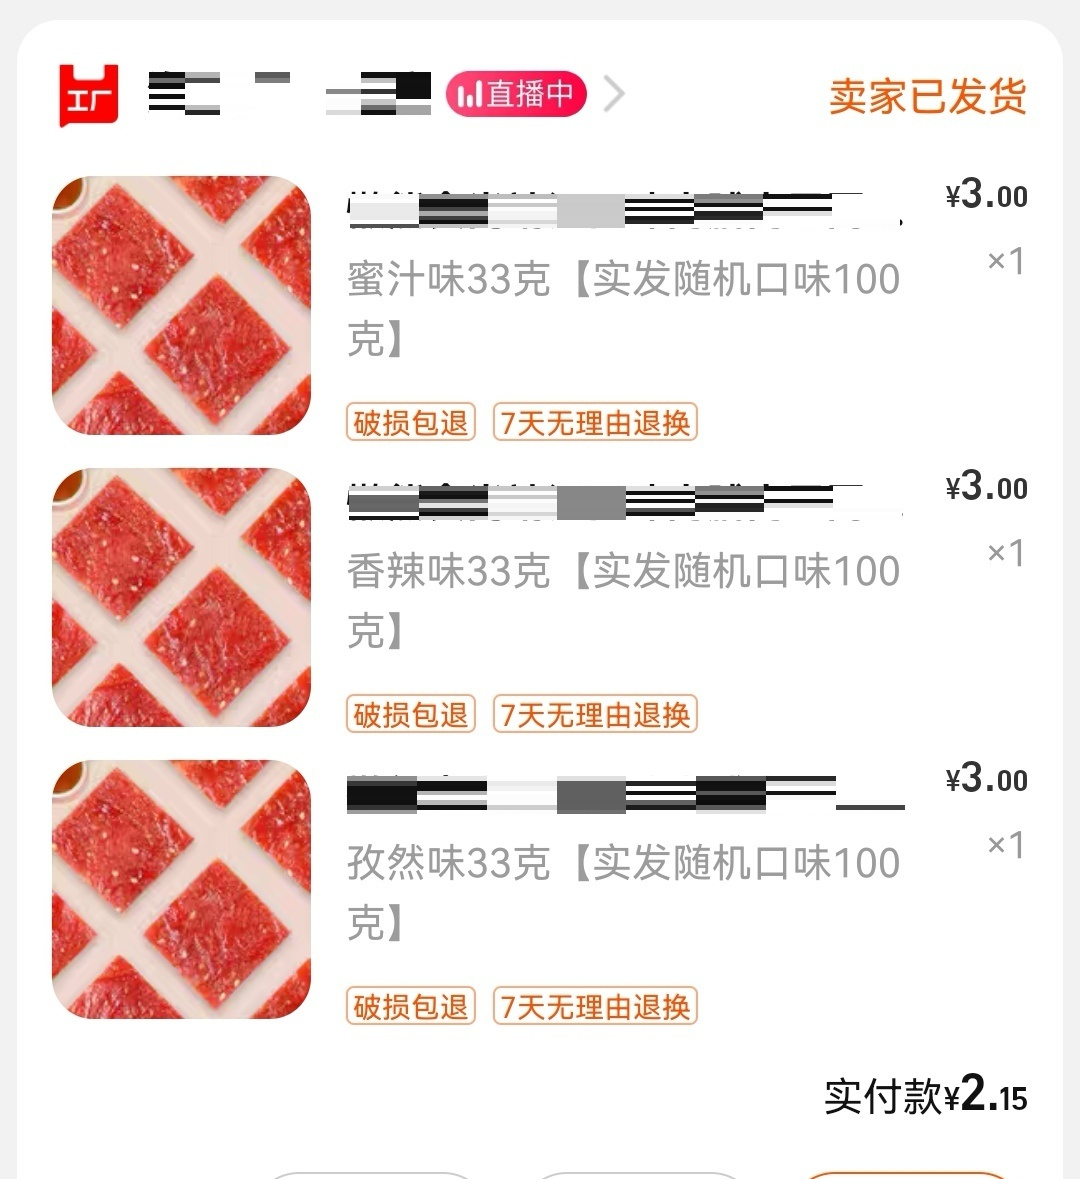

In [8]:
from PIL import Image
from IPython.display import display

# Open the image
img_path = input_data[0]['image'][0]
img = Image.open(img_path)

# Display the image in Jupyter Notebook
display(img)


In [5]:
from dataset import create_data_loader,CustomDataset
import json
json_file=json.load(open('/home/pubw/proj/LLaMA-Factory/data/mire/train_modified.json'))
dataloader=create_data_loader(json_file,'')

In [8]:
dataset = CustomDataset(json_file,'')

In [7]:
dataset.__getitem__(1)

{'id': '2104a80d17282572952783243d0afd', 'instruction': '你是一个电商客服专家，请根据用户与客服的多轮对话判断用户的意图分类标签。\n<用户与客服的对话 START>\n用户: <http>\n客服: 您具体想要了解什么问题呢？\n用户: <image>\n客服: 亲爱的顾客，我们的智能助手还在成长中，目前还无法识别图片内容，麻烦您用文字简要说明遇到的问题，非常感谢。\n用户: 亲爱的:这款商品是全部采用金属材质的吗？\n客服: \n<用户与客服的对话 END>\n请直接只输出分类标签结果，不需要其他多余的话。以下是可以参考的分类标签为：["反馈密封性不好","是否好用","是否会生锈","排水方式","包装区别","发货数量","反馈用后症状","商品材质","功效功能","是否易褪色","适用季节","能否调光","版本款型区别","单品推荐","用法用量","控制方式","上市时间","商品规格","信号情况","养护方法","套装推荐","何时上货","气泡"]\n', 'input': '', 'output': '商品材质', 'image': ['/home/pubw/datasets/www25/train/images/2104a80d17282572952783243d0afd-0.jpg']}


{'id': '2104a80d17282572952783243d0afd',
 'instruction': '你是一个电商客服专家，请根据用户与客服的多轮对话判断用户的意图分类标签。\n<用户与客服的对话 START>\n用户: <http>\n客服: 您具体想要了解什么问题呢？\n用户: <image>\n客服: 亲爱的顾客，我们的智能助手还在成长中，目前还无法识别图片内容，麻烦您用文字简要说明遇到的问题，非常感谢。\n用户: 亲爱的:这款商品是全部采用金属材质的吗？\n客服: \n<用户与客服的对话 END>\n请直接只输出分类标签结果，不需要其他多余的话。以下是可以参考的分类标签为：["反馈密封性不好","是否好用","是否会生锈","排水方式","包装区别","发货数量","反馈用后症状","商品材质","功效功能","是否易褪色","适用季节","能否调光","版本款型区别","单品推荐","用法用量","控制方式","上市时间","商品规格","信号情况","养护方法","套装推荐","何时上货","气泡"]\n',
 'input': '',
 'output': '商品材质',
 'image': ['/home/pubw/datasets/www25/train/images/2104a80d17282572952783243d0afd-0.jpg']}

In [ ]:
for item in dataloader:
    print(item)
    break

{'id': '213e438b17282904772446704d0b28', 'instruction': '你是一个电商客服专家，请根据用户与客服的多轮对话判断用户的意图分类标签。\n<用户与客服的对话 START>\n用户: <image>\n客服: 抱歉哦，小富目前还不能识别图片，您可以简单描述一下遇到的问题吗？/:068~~\n用户: <http>\n客服: 若您仍有疑问，可回复“客服”以便进一步协助您~\n用户: 内胆使用的是316不锈钢吗\n客服: 亲爱的，升级版的抗菌不锈钢是在304不锈钢的基础上改进的，它有抗菌功能（其内胆表面能够释放具有抑菌作用的铜离子，有效阻止大肠杆菌和金黄色葡萄球菌等有害细菌的生长）；不过它的抗酸碱和抗腐蚀性能比不上316不锈钢；而316不锈钢在抗腐蚀和抗酸碱方面表现更佳，但没有抗菌功能。  ▲对于居住在海边或喜欢储存各种饮品的人来说，推荐使用316不锈钢；如果是为了儿童使用，建议选择抗菌不锈钢；追求性价比的话，304不锈钢是不错的选择；/:810\n<用户与客服的对话 END>\n请直接只输出分类标签结果，不需要其他多余的话。以下是可以参考的分类标签为：["反馈密封性不好","是否好用","是否会生锈","排水方式","包装区别","发货数量","反馈用后症状","商品材质","功效功能","是否易褪色","适用季节","能否调光","版本款型区别","单品推荐","用法用量","控制方式","上市时间","商品规格","信号情况","养护方法","套装推荐","何时上货","气泡"]\n', 'input': '', 'output': '商品材质', 'image': ['/home/pubw/datasets/www25/train/images/213e438b17282904772446704d0b28-0.jpg']}{'id': '212c8bd517276234453407314d1039', 'instruction': '你是一个电商客服专家，请根据用户与客服的多轮对话判断用户的意图分类标签。\n<用户与客服的对话 START>\n用户: <http>\n客服: 国庆促销狂欢  【护肤隔离霜】  ⏰促销时间：9月26日20:00~10月7日23:59 ☞单支预计到手价69元 ☞两支预计到手价123元 ☞

: 

[{'role': 'user', 'content': [{'type': 'image', 'image': '/home/pubw/datasets/www25/train/images/2107347617277435206931576d0af4-0.jpg'}, {'type': 'text', 'text': 'Picture {1}: <image>\n     请你对图片进行总结'}]}]
